In [1]:
#Libraries

from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Get Data from web

URL = "https://listado.mercadolibre.com.ar/notebook#D[A:notebook]"

page = requests.get(URL)
pageSoup = soup(page.content, "html.parser")
ppageSoup = soup(pageSoup.prettify(), "html.parser")

#print(ppageSoup)

containers = ppageSoup.find_all(class_="andes-card ui-search-result shops__cardStyles ui-search-result--core andes-card--flat andes-card--padding-16")

#print(containers[0].get_text())

In [9]:
#Clean up and organice the data

#print(len(containers))

d = {"Title":[], "Price":[], "Calification":[]}

for container in containers:
    title = container.find("h2", class_="ui-search-item__title shops__item-title").get_text()
    title = title.strip()
    price = container.find("span", class_="andes-money-amount__fraction").get_text()
    price = price.strip()
    
    try:
        califgross = container.find("div", class_="ui-search-reviews ui-search-item__group__element shops__items-group-details").get_text()
        califgross = califgross.strip()
        calif = califgross[13:16]

    except AttributeError:
        calif = " "
    #print(container)
    
    d["Title"].append(title)
    d["Price"].append(price)
    d["Calification"].append(calif)
    
    

MercadoLibredf = pd.DataFrame.from_dict(d)
MercadoLibredf = MercadoLibredf.where(pd.notnull(MercadoLibredf), " ")
MercadoLibredf['Price'] = MercadoLibredf['Price'].str.replace(".", "").astype(int)
#print(MercadoLibredf)
MercadoLibredf.to_csv('MLdf.csv', header=True, index=False)


C:\Users\Blight\AppData\Local\Temp\ipykernel_8744\840013347.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  MercadoLibredf['Price'] = MercadoLibredf['Price'].str.replace(".", "").astype(int)


In [4]:
#Read newly created csv

df = pd.read_csv('MLdf.csv')

df.head()

,Title,Price,Calification
0,Notebook Lenovo Intel I3 1115g4 Ideapad 3 14it...,489.999,4.6
1,"Laptop Asus VivoBook Go 15 E510KA gris 15.6"", ...",249.999,4.6
2,"Laptop HP 15-ef2529la plata natural 15.6"", AMD...",699.999,4.9
3,Notebook Lenovo I5 1135g7 8gb Ram 512gb Ssd 14...,565.649,4.6
4,Notebook Lenovo Ideapad 1i Intel I3 1215u 4gb ...,348.500,4.7


In [5]:
#Combine all of the above code into one function

def check_price():
    
    URL = "https://listado.mercadolibre.com.ar/notebook#D[A:notebook]"

    page = requests.get(URL)
    pageSoup = soup(page.content, "html.parser")
    ppageSoup = soup(pageSoup.prettify(), "html.parser")
    
    containers = ppageSoup.find_all(class_="andes-card ui-search-result shops__cardStyles ui-search-result--core andes-card--flat andes-card--padding-16")
    
    d = {"Title":[], "Price":[], "Calification":[]}

    for container in containers:
        title = container.find("h2", class_="ui-search-item__title shops__item-title").get_text()
        title = title.strip()
        price = container.find("span", class_="andes-money-amount__fraction").get_text()
        price = price.strip()

        try:
            califgross = container.find("div", class_="ui-search-reviews ui-search-item__group__element shops__items-group-details").get_text()
            califgross = califgross.strip()
            calif = califgross[13:16]

        except AttributeError:
            calif = " "

        d["Title"].append(title)
        d["Price"].append(price)
        d["Calification"].append(calif)
        
    MercadoLibredf = pd.DataFrame.from_dict(d)
    MercadoLibredf = MercadoLibredf.where(pd.notnull(df), " ")
    MercadoLibredf['Price'] = MercadoLibredf['Price'].str.replace(".", "").astype(int)
    MercadoLibredf.to_csv('MLdf.csv', header=True, index=False)


C:\Users\Blight\AppData\Local\Temp\ipykernel_8744\1738114022.py:37: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  MercadoLibredf['Price'] = MercadoLibredf['Price'].str.replace(".", "").astype(int)


In [6]:
#Runs check_price after a set time and inputs data into your CSV

#while(True):
#    check_price()
#    time.sleep(86400)

In [7]:
df = pd.read_csv('MLdf.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         54 non-null     object
 1   Price         54 non-null     object
 2   Calification  52 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


C:\Users\Blight\AppData\Local\Temp\ipykernel_8744\4275972970.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data, bins=10, kde=True, color='blue').set_xticklabels(data, rotation=90, verticalalignment='center')


[Text(-500000.0, 0, '489999'),
 Text(0.0, 0, '249999'),
 Text(500000.0, 0, '699999'),
 Text(1000000.0, 0, '565649'),
 Text(1500000.0, 0, '348500'),
 Text(2000000.0, 0, '269280'),
 Text(2500000.0, 0, '446000')]

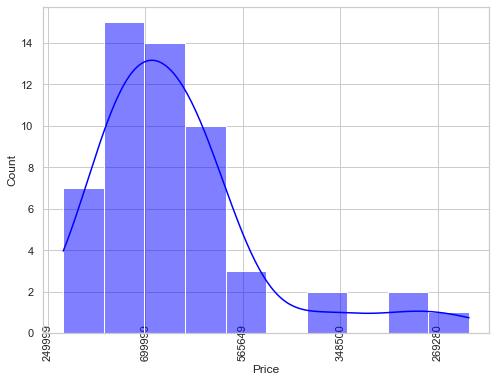

In [8]:
data = MercadoLibredf['Price']

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=10, kde=True, color='blue').set_xticklabels(data, rotation=90, verticalalignment='center')